In [1]:
import numpy as np
import pandas as pd
import joblib
import os
import ast
import re
from sklearn.ensemble import RandomForestClassifier

In [2]:
model = joblib.load("training_results/RF/2022_11_06-0105/model.joblib")
model

RandomForestClassifier(bootstrap=False, max_depth=108, max_features='log2',
                       min_samples_split=3, n_estimators=585, verbose=10)

In [7]:
path = "training_results/RF/2022_11_06-0105"

if path is None:
    path = [x[0] for x in os.walk("./training_results/RF")][-1:][0]


def tryval(val):
    try:
        val = ast.literal_eval(val)
    except:
        pass
    return val


param_dict = {}
USE_OS = False
USE_REDUCED = False

with open(path + "/mode.txt", "r") as f:
    for line in f:
        line = re.sub('[ ]', '', line)[:-1]
        line = line.split(":")
        if line[0] == "OS":
            USE_OS = tryval(line[1])
        if line[0] == "REDUCED":
            USE_REDUCED = tryval(line[1])

if USE_OS:
    if USE_REDUCED:
        X_train = pd.read_pickle("./processed_files/01c_train_X_RS_reduced.pkl")
        X_test = pd.read_pickle("./processed_files/01b_test_X_reduced.pkl")
    else:
        X_train = pd.read_pickle("./processed_files/01c_train_X_RS.pkl")
        X_test = pd.read_pickle("./processed_files/01b_test_X.pkl")
    y_train = pd.read_pickle("./processed_files/01c_train_y_RS.pkl")
else:
    X_train = pd.read_pickle("./processed_files/01b_train_X.pkl")
    X_test = pd.read_pickle("./processed_files/01b_test_X.pkl")
    y_train = pd.read_pickle("./processed_files/01b_train_y.pkl")
y_test = pd.read_pickle("./processed_files/01b_test_y.pkl")

X_train = X_train.to_numpy()
y_train = y_train.to_numpy().ravel()
X_test = X_test.to_numpy()

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 585 out of 585 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

Train ACC: 
0.9999662880392071
Train BAL-ACC: 
0.999966288039207
Test ACC: 
0.5808957362952347
Test BAL-ACC: 
0.47845275223197836


<AxesSubplot:>

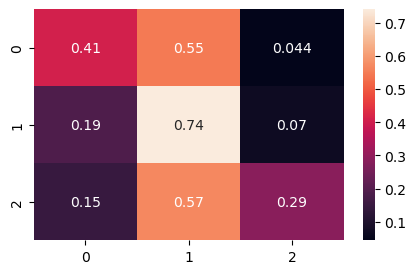

In [18]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print("Train ACC: ")
print(accuracy_score(y_true=y_train, y_pred=y_train_pred, normalize=True))
print("Train BAL-ACC: ")
print(balanced_accuracy_score(y_true=y_train, y_pred=y_train_pred))
print("Test ACC: ")
print(accuracy_score(y_true=y_test, y_pred=y_test_pred, normalize=True))
print("Test BAL-ACC: ")
print(balanced_accuracy_score(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred, normalize="true")
ax = plt.figure(figsize= (5,3))
sns.heatmap(cm, annot=True)

<AxesSubplot:>

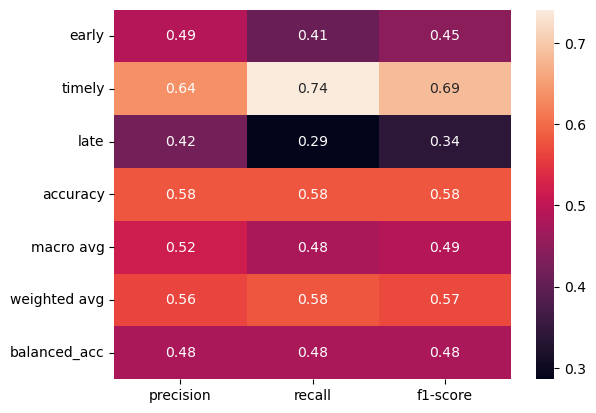

In [29]:
from sklearn.metrics import classification_report

target_names = ["early", "timely", "late"]
report = classification_report(y_true=y_test, y_pred=y_test_pred, target_names=target_names, output_dict=True)
report.update({"balanced_acc" : balanced_accuracy_score(y_true=y_test, y_pred=y_test_pred)})
report_df = pd.DataFrame(report).iloc[:-1, :].T
sns.heatmap(report_df, annot=True)